In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm as tqdm

%matplotlib inline

import torch
import torchvision

import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import random

from torch.utils.data import Dataset, DataLoader

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

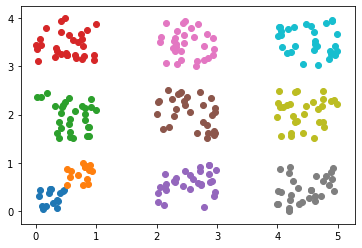

In [3]:
x11 = np.random.uniform(low=[0,0], high = [0.5,0.5],size =(15,2) )
x12 = np.random.uniform(low=[0.5,0.5], high = [1,1],size =(15,2) )


x2 = np.random.uniform(low = [0,1.5] , high = [1,2.5],size=(30,2))
x3 = np.random.uniform(low = [0,3] , high = [1,4],size=(30,2))

x4 = np.random.uniform(low = [2,0] , high = [3,1],size=(30,2))

x5 = np.random.uniform(low = [2,1.5] , high = [3,2.5],size=(30,2))

x6 = np.random.uniform(low = [2,3] , high = [3,4],size=(30,2))

x7 = np.random.uniform(low = [4,0] , high = [5,1],size=(30,2))

x8 = np.random.uniform(low = [4,1.5] , high = [5,2.5],size=(30,2))

x9 = np.random.uniform(low = [4,3] , high = [5,4],size=(30,2))
plt.scatter(x11[:,0],x11[:,1])
plt.scatter(x12[:,0],x12[:,1])
plt.scatter(x2[:,0],x2[:,1])
plt.scatter(x3[:,0],x3[:,1])

plt.scatter(x4[:,0],x4[:,1])
plt.scatter(x5[:,0],x5[:,1])
plt.scatter(x6[:,0],x6[:,1])


plt.scatter(x7[:,0],x7[:,1])
plt.scatter(x8[:,0],x8[:,1])
plt.scatter(x9[:,0],x9[:,1])



In [4]:
y11  = np.zeros(15)
y12 = np.ones(15)

Y2_ = []
for i in range(8):
    idx = np.random.randint(0,30,size=15)
    y2 = np.ones(30)
    y2[idx] = 0 
    Y2_.append(y2)

Y2_ = np.concatenate(Y2_,axis=0)
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [5]:
X_train = np.concatenate((x11,x12,x2,x3,x4,x5,x6,x7,x8,x9))

Y_train = np.concatenate((y11,y12,Y2_))



In [6]:
X_train.shape,Y_train.shape

((270, 2), (270,))

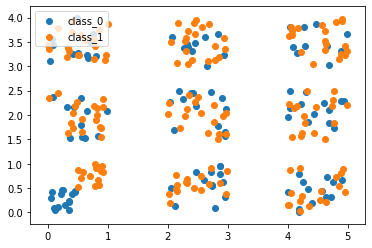

In [7]:
plt.scatter(X_train[Y_train==0,0],X_train[Y_train==0,1],label = "class_0")
plt.scatter(X_train[Y_train==1,0],X_train[Y_train==1,1],label = "class_1")
plt.legend()


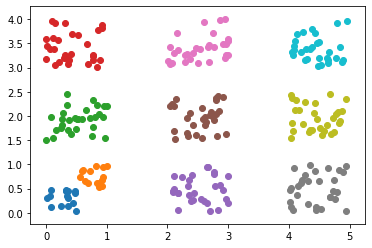

In [8]:
x11 = np.random.uniform(low=[0,0], high = [0.5,0.5],size =(15,2) )
x12 = np.random.uniform(low=[0.5,0.5], high = [1,1],size =(15,2) )


x2 = np.random.uniform(low = [0,1.5] , high = [1,2.5],size=(30,2))
x3 = np.random.uniform(low = [0,3] , high = [1,4],size=(30,2))

x4 = np.random.uniform(low = [2,0] , high = [3,1],size=(30,2))

x5 = np.random.uniform(low = [2,1.5] , high = [3,2.5],size=(30,2))

x6 = np.random.uniform(low = [2,3] , high = [3,4],size=(30,2))

x7 = np.random.uniform(low = [4,0] , high = [5,1],size=(30,2))

x8 = np.random.uniform(low = [4,1.5] , high = [5,2.5],size=(30,2))

x9 = np.random.uniform(low = [4,3] , high = [5,4],size=(30,2))
plt.scatter(x11[:,0],x11[:,1])
plt.scatter(x12[:,0],x12[:,1])
plt.scatter(x2[:,0],x2[:,1])
plt.scatter(x3[:,0],x3[:,1])

plt.scatter(x4[:,0],x4[:,1])
plt.scatter(x5[:,0],x5[:,1])
plt.scatter(x6[:,0],x6[:,1])


plt.scatter(x7[:,0],x7[:,1])
plt.scatter(x8[:,0],x8[:,1])
plt.scatter(x9[:,0],x9[:,1])

yt11  = np.zeros(15)
yt12 = np.ones(15)

Yt2_ = []
for i in range(8):
    idx = np.random.randint(0,30,size=15)
    yt2 = np.ones(30)
    yt2[idx] = 0 
    Yt2_.append(yt2)

Yt2_ = np.concatenate(Yt2_,axis=0)
Y_test = np.concatenate((yt11,yt12,Yt2_))
X_test = np.concatenate((x11,x12,x2,x3,x4,x5,x6,x7,x8,x9))

In [9]:
class Grid_data(Dataset):
    def __init__(self,x,y):
        self.x = torch.Tensor(x)
        self.y = torch.Tensor(y).type(torch.LongTensor)
    
    def __len__(self):
        
        return len(self.x)
    
    
    def __getitem__(self,idx):
        self.dx = self.x[idx,:]
        self.dy = self.y[idx]
        
        self.dx = self.dx
        self.dy = self.dy
        return self.dx, self.dy
        

In [10]:
trainset = Grid_data(X_train,Y_train)


In [11]:
trainloader = DataLoader(trainset,batch_size=10,shuffle = False)

In [12]:
inputs,label = iter(trainloader).next()

In [13]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        self.linear1 = nn.Linear(2,64)
        self.linear2 = nn.Linear(64,64)
#         self.linear3 = nn.Linear(64,128)
#         self.linear4 = nn.Linear(128,256)
#         self.linear5 = nn.Linear(256,128)
#         self.linear6 = nn.Linear(128,64)
#         self.linear7 = nn.Linear(64,32)
#         self.linear8 = nn.Linear(32,16)
        self.linear9 = nn.Linear(64,2)
        
    def forward(self,x):
        x =F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
#         x = F.relu(self.linear3(x))
#         x = F.relu(self.linear4(x))
#         x = F.relu(self.linear5(x))
#         x = F.relu(self.linear6(x))
#         x = F.relu(self.linear7(x))
#         x = F.relu(self.linear8(x))
        x = self.linear9(x)
        
        
        return x

In [14]:
net = Net()
# net(inputs)


In [15]:
net = net.to("cuda")

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)#, momentum=0.9)

In [17]:
loss_curi = []
epochs_nos= 10000
for epoch in range(epochs_nos): # loop over the dataset multiple times
    ep_lossi = []
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to("cuda"),labels.to("cuda")

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2 == 1:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss/2 ))
            ep_lossi.append(running_loss/2) # loss per minibatch
            running_loss = 0.0
    if(np.mean(ep_lossi) <= 0.5):
        break          
    loss_curi.append(np.mean(ep_lossi))   #loss per epoch
#     if (epoch%5 == 0):
#         _,actis= inc(inputs)
#         acti.append(actis)
    
            

print('Finished Training')

[1,     2] loss: 0.734
[1,     4] loss: 0.666
[1,     6] loss: 0.679
[1,     8] loss: 0.623
[1,    10] loss: 0.734
[1,    12] loss: 0.690
[1,    14] loss: 0.710
[1,    16] loss: 0.650
[1,    18] loss: 0.648
[1,    20] loss: 0.680
[1,    22] loss: 0.674
[1,    24] loss: 0.712
[1,    26] loss: 0.705
[2,     2] loss: 0.705
[2,     4] loss: 0.617
[2,     6] loss: 0.678
[2,     8] loss: 0.618
[2,    10] loss: 0.725
[2,    12] loss: 0.684
[2,    14] loss: 0.704
[2,    16] loss: 0.649
[2,    18] loss: 0.647
[2,    20] loss: 0.678
[2,    22] loss: 0.671
[2,    24] loss: 0.717
[2,    26] loss: 0.706
[3,     2] loss: 0.693
[3,     4] loss: 0.618
[3,     6] loss: 0.677
[3,     8] loss: 0.620
[3,    10] loss: 0.721
[3,    12] loss: 0.684
[3,    14] loss: 0.703
[3,    16] loss: 0.648
[3,    18] loss: 0.647
[3,    20] loss: 0.678
[3,    22] loss: 0.671
[3,    24] loss: 0.716
[3,    26] loss: 0.711
[4,     2] loss: 0.684
[4,     4] loss: 0.614
[4,     6] loss: 0.676
[4,     8] loss: 0.619
[4,    10] 

[29,    14] loss: 0.719
[29,    16] loss: 0.648
[29,    18] loss: 0.650
[29,    20] loss: 0.685
[29,    22] loss: 0.665
[29,    24] loss: 0.709
[29,    26] loss: 0.700
[30,     2] loss: 0.283
[30,     4] loss: 0.561
[30,     6] loss: 0.671
[30,     8] loss: 0.614
[30,    10] loss: 0.741
[30,    12] loss: 0.660
[30,    14] loss: 0.715
[30,    16] loss: 0.646
[30,    18] loss: 0.648
[30,    20] loss: 0.685
[30,    22] loss: 0.665
[30,    24] loss: 0.710
[30,    26] loss: 0.703
[31,     2] loss: 0.270
[31,     4] loss: 0.562
[31,     6] loss: 0.669
[31,     8] loss: 0.616
[31,    10] loss: 0.743
[31,    12] loss: 0.657
[31,    14] loss: 0.717
[31,    16] loss: 0.646
[31,    18] loss: 0.649
[31,    20] loss: 0.687
[31,    22] loss: 0.665
[31,    24] loss: 0.708
[31,    26] loss: 0.699
[32,     2] loss: 0.263
[32,     4] loss: 0.559
[32,     6] loss: 0.669
[32,     8] loss: 0.617
[32,    10] loss: 0.737
[32,    12] loss: 0.661
[32,    14] loss: 0.719
[32,    16] loss: 0.648
[32,    18] loss

[58,     8] loss: 0.620
[58,    10] loss: 0.746
[58,    12] loss: 0.629
[58,    14] loss: 0.714
[58,    16] loss: 0.645
[58,    18] loss: 0.648
[58,    20] loss: 0.689
[58,    22] loss: 0.669
[58,    24] loss: 0.700
[58,    26] loss: 0.707
[59,     2] loss: 0.123
[59,     4] loss: 0.463
[59,     6] loss: 0.680
[59,     8] loss: 0.609
[59,    10] loss: 0.745
[59,    12] loss: 0.630
[59,    14] loss: 0.707
[59,    16] loss: 0.645
[59,    18] loss: 0.648
[59,    20] loss: 0.685
[59,    22] loss: 0.668
[59,    24] loss: 0.702
[59,    26] loss: 0.707
[60,     2] loss: 0.117
[60,     4] loss: 0.462
[60,     6] loss: 0.676
[60,     8] loss: 0.624
[60,    10] loss: 0.754
[60,    12] loss: 0.635
[60,    14] loss: 0.714
[60,    16] loss: 0.643
[60,    18] loss: 0.647
[60,    20] loss: 0.688
[60,    22] loss: 0.673
[60,    24] loss: 0.697
[60,    26] loss: 0.707
[61,     2] loss: 0.116
[61,     4] loss: 0.460
[61,     6] loss: 0.676
[61,     8] loss: 0.611
[61,    10] loss: 0.747
[61,    12] loss

[87,     8] loss: 0.611
[87,    10] loss: 0.751
[87,    12] loss: 0.624
[87,    14] loss: 0.704
[87,    16] loss: 0.642
[87,    18] loss: 0.647
[87,    20] loss: 0.678
[87,    22] loss: 0.671
[87,    24] loss: 0.697
[87,    26] loss: 0.708
[88,     2] loss: 0.071
[88,     4] loss: 0.421
[88,     6] loss: 0.671
[88,     8] loss: 0.610
[88,    10] loss: 0.749
[88,    12] loss: 0.608
[88,    14] loss: 0.700
[88,    16] loss: 0.643
[88,    18] loss: 0.646
[88,    20] loss: 0.681
[88,    22] loss: 0.667
[88,    24] loss: 0.698
[88,    26] loss: 0.710
[89,     2] loss: 0.068
[89,     4] loss: 0.415
[89,     6] loss: 0.670
[89,     8] loss: 0.612
[89,    10] loss: 0.744
[89,    12] loss: 0.597
[89,    14] loss: 0.695
[89,    16] loss: 0.644
[89,    18] loss: 0.647
[89,    20] loss: 0.686
[89,    22] loss: 0.666
[89,    24] loss: 0.698
[89,    26] loss: 0.715
[90,     2] loss: 0.068
[90,     4] loss: 0.413
[90,     6] loss: 0.671
[90,     8] loss: 0.608
[90,    10] loss: 0.747
[90,    12] loss

[116,     8] loss: 0.607
[116,    10] loss: 0.743
[116,    12] loss: 0.581
[116,    14] loss: 0.688
[116,    16] loss: 0.642
[116,    18] loss: 0.646
[116,    20] loss: 0.675
[116,    22] loss: 0.670
[116,    24] loss: 0.695
[116,    26] loss: 0.716
[117,     2] loss: 0.044
[117,     4] loss: 0.392
[117,     6] loss: 0.665
[117,     8] loss: 0.609
[117,    10] loss: 0.746
[117,    12] loss: 0.576
[117,    14] loss: 0.689
[117,    16] loss: 0.641
[117,    18] loss: 0.645
[117,    20] loss: 0.680
[117,    22] loss: 0.666
[117,    24] loss: 0.696
[117,    26] loss: 0.715
[118,     2] loss: 0.042
[118,     4] loss: 0.391
[118,     6] loss: 0.664
[118,     8] loss: 0.609
[118,    10] loss: 0.742
[118,    12] loss: 0.570
[118,    14] loss: 0.688
[118,    16] loss: 0.641
[118,    18] loss: 0.645
[118,    20] loss: 0.682
[118,    22] loss: 0.663
[118,    24] loss: 0.697
[118,    26] loss: 0.718
[119,     2] loss: 0.043
[119,     4] loss: 0.391
[119,     6] loss: 0.663
[119,     8] loss: 0.613


[144,    16] loss: 0.641
[144,    18] loss: 0.644
[144,    20] loss: 0.674
[144,    22] loss: 0.660
[144,    24] loss: 0.698
[144,    26] loss: 0.718
[145,     2] loss: 0.030
[145,     4] loss: 0.373
[145,     6] loss: 0.660
[145,     8] loss: 0.610
[145,    10] loss: 0.737
[145,    12] loss: 0.547
[145,    14] loss: 0.683
[145,    16] loss: 0.639
[145,    18] loss: 0.645
[145,    20] loss: 0.670
[145,    22] loss: 0.664
[145,    24] loss: 0.697
[145,    26] loss: 0.717
[146,     2] loss: 0.030
[146,     4] loss: 0.366
[146,     6] loss: 0.663
[146,     8] loss: 0.605
[146,    10] loss: 0.740
[146,    12] loss: 0.542
[146,    14] loss: 0.679
[146,    16] loss: 0.644
[146,    18] loss: 0.645
[146,    20] loss: 0.674
[146,    22] loss: 0.660
[146,    24] loss: 0.698
[146,    26] loss: 0.726
[147,     2] loss: 0.029
[147,     4] loss: 0.373
[147,     6] loss: 0.661
[147,     8] loss: 0.611
[147,    10] loss: 0.740
[147,    12] loss: 0.549
[147,    14] loss: 0.684
[147,    16] loss: 0.638


[173,    12] loss: 0.530
[173,    14] loss: 0.675
[173,    16] loss: 0.645
[173,    18] loss: 0.645
[173,    20] loss: 0.659
[173,    22] loss: 0.664
[173,    24] loss: 0.700
[173,    26] loss: 0.724
[174,     2] loss: 0.019
[174,     4] loss: 0.361
[174,     6] loss: 0.662
[174,     8] loss: 0.608
[174,    10] loss: 0.741
[174,    12] loss: 0.522
[174,    14] loss: 0.682
[174,    16] loss: 0.637
[174,    18] loss: 0.648
[174,    20] loss: 0.667
[174,    22] loss: 0.666
[174,    24] loss: 0.696
[174,    26] loss: 0.717
[175,     2] loss: 0.023
[175,     4] loss: 0.347
[175,     6] loss: 0.666
[175,     8] loss: 0.608
[175,    10] loss: 0.735
[175,    12] loss: 0.534
[175,    14] loss: 0.676
[175,    16] loss: 0.644
[175,    18] loss: 0.644
[175,    20] loss: 0.661
[175,    22] loss: 0.663
[175,    24] loss: 0.699
[175,    26] loss: 0.727
[176,     2] loss: 0.019
[176,     4] loss: 0.357
[176,     6] loss: 0.660
[176,     8] loss: 0.605
[176,    10] loss: 0.747
[176,    12] loss: 0.520


[202,    16] loss: 0.635
[202,    18] loss: 0.645
[202,    20] loss: 0.663
[202,    22] loss: 0.652
[202,    24] loss: 0.708
[202,    26] loss: 0.717
[203,     2] loss: 0.017
[203,     4] loss: 0.319
[203,     6] loss: 0.665
[203,     8] loss: 0.628
[203,    10] loss: 0.723
[203,    12] loss: 0.521
[203,    14] loss: 0.677
[203,    16] loss: 0.642
[203,    18] loss: 0.643
[203,    20] loss: 0.656
[203,    22] loss: 0.664
[203,    24] loss: 0.696
[203,    26] loss: 0.739
[204,     2] loss: 0.016
[204,     4] loss: 0.325
[204,     6] loss: 0.661
[204,     8] loss: 0.599
[204,    10] loss: 0.763
[204,    12] loss: 0.536
[204,    14] loss: 0.670
[204,    16] loss: 0.641
[204,    18] loss: 0.644
[204,    20] loss: 0.650
[204,    22] loss: 0.664
[204,    24] loss: 0.703
[204,    26] loss: 0.711
[205,     2] loss: 0.015
[205,     4] loss: 0.358
[205,     6] loss: 0.664
[205,     8] loss: 0.616
[205,    10] loss: 0.741
[205,    12] loss: 0.508
[205,    14] loss: 0.687
[205,    16] loss: 0.635


[231,     8] loss: 0.603
[231,    10] loss: 0.744
[231,    12] loss: 0.485
[231,    14] loss: 0.657
[231,    16] loss: 0.639
[231,    18] loss: 0.643
[231,    20] loss: 0.649
[231,    22] loss: 0.652
[231,    24] loss: 0.703
[231,    26] loss: 0.713
[232,     2] loss: 0.012
[232,     4] loss: 0.306
[232,     6] loss: 0.662
[232,     8] loss: 0.612
[232,    10] loss: 0.737
[232,    12] loss: 0.488
[232,    14] loss: 0.657
[232,    16] loss: 0.638
[232,    18] loss: 0.644
[232,    20] loss: 0.650
[232,    22] loss: 0.653
[232,    24] loss: 0.701
[232,    26] loss: 0.717
[233,     2] loss: 0.012
[233,     4] loss: 0.299
[233,     6] loss: 0.666
[233,     8] loss: 0.601
[233,    10] loss: 0.745
[233,    12] loss: 0.482
[233,    14] loss: 0.656
[233,    16] loss: 0.642
[233,    18] loss: 0.643
[233,    20] loss: 0.645
[233,    22] loss: 0.656
[233,    24] loss: 0.703
[233,    26] loss: 0.714
[234,     2] loss: 0.011
[234,     4] loss: 0.309
[234,     6] loss: 0.661
[234,     8] loss: 0.610


[259,    10] loss: 0.743
[259,    12] loss: 0.485
[259,    14] loss: 0.652
[259,    16] loss: 0.657
[259,    18] loss: 0.649
[259,    20] loss: 0.633
[259,    22] loss: 0.658
[259,    24] loss: 0.703
[259,    26] loss: 0.719
[260,     2] loss: 0.008
[260,     4] loss: 0.327
[260,     6] loss: 0.664
[260,     8] loss: 0.613
[260,    10] loss: 0.750
[260,    12] loss: 0.469
[260,    14] loss: 0.668
[260,    16] loss: 0.638
[260,    18] loss: 0.661
[260,    20] loss: 0.652
[260,    22] loss: 0.652
[260,    24] loss: 0.699
[260,    26] loss: 0.702
[261,     2] loss: 0.011
[261,     4] loss: 0.281
[261,     6] loss: 0.686
[261,     8] loss: 0.601
[261,    10] loss: 0.740
[261,    12] loss: 0.486
[261,    14] loss: 0.652
[261,    16] loss: 0.657
[261,    18] loss: 0.648
[261,    20] loss: 0.632
[261,    22] loss: 0.660
[261,    24] loss: 0.706
[261,    26] loss: 0.721
[262,     2] loss: 0.008
[262,     4] loss: 0.326
[262,     6] loss: 0.664
[262,     8] loss: 0.606
[262,    10] loss: 0.755


[287,    24] loss: 0.700
[287,    26] loss: 0.716
[288,     2] loss: 0.008
[288,     4] loss: 0.274
[288,     6] loss: 0.666
[288,     8] loss: 0.598
[288,    10] loss: 0.747
[288,    12] loss: 0.468
[288,    14] loss: 0.650
[288,    16] loss: 0.646
[288,    18] loss: 0.643
[288,    20] loss: 0.629
[288,    22] loss: 0.655
[288,    24] loss: 0.701
[288,    26] loss: 0.714
[289,     2] loss: 0.006
[289,     4] loss: 0.293
[289,     6] loss: 0.658
[289,     8] loss: 0.608
[289,    10] loss: 0.748
[289,    12] loss: 0.457
[289,    14] loss: 0.657
[289,    16] loss: 0.635
[289,    18] loss: 0.651
[289,    20] loss: 0.640
[289,    22] loss: 0.646
[289,    24] loss: 0.704
[289,    26] loss: 0.706
[290,     2] loss: 0.008
[290,     4] loss: 0.273
[290,     6] loss: 0.669
[290,     8] loss: 0.606
[290,    10] loss: 0.735
[290,    12] loss: 0.468
[290,    14] loss: 0.653
[290,    16] loss: 0.651
[290,    18] loss: 0.642
[290,    20] loss: 0.628
[290,    22] loss: 0.654
[290,    24] loss: 0.703


[316,    18] loss: 0.642
[316,    20] loss: 0.620
[316,    22] loss: 0.660
[316,    24] loss: 0.700
[316,    26] loss: 0.710
[317,     2] loss: 0.005
[317,     4] loss: 0.271
[317,     6] loss: 0.656
[317,     8] loss: 0.608
[317,    10] loss: 0.746
[317,    12] loss: 0.451
[317,    14] loss: 0.652
[317,    16] loss: 0.634
[317,    18] loss: 0.643
[317,    20] loss: 0.640
[317,    22] loss: 0.635
[317,    24] loss: 0.712
[317,    26] loss: 0.713
[318,     2] loss: 0.005
[318,     4] loss: 0.275
[318,     6] loss: 0.654
[318,     8] loss: 0.605
[318,    10] loss: 0.739
[318,    12] loss: 0.464
[318,    14] loss: 0.645
[318,    16] loss: 0.644
[318,    18] loss: 0.642
[318,    20] loss: 0.618
[318,    22] loss: 0.661
[318,    24] loss: 0.700
[318,    26] loss: 0.721
[319,     2] loss: 0.005
[319,     4] loss: 0.261
[319,     6] loss: 0.666
[319,     8] loss: 0.596
[319,    10] loss: 0.754
[319,    12] loss: 0.455
[319,    14] loss: 0.650
[319,    16] loss: 0.636
[319,    18] loss: 0.642


[346,    12] loss: 0.449
[346,    14] loss: 0.647
[346,    16] loss: 0.637
[346,    18] loss: 0.654
[346,    20] loss: 0.620
[346,    22] loss: 0.656
[346,    24] loss: 0.699
[346,    26] loss: 0.714
[347,     2] loss: 0.005
[347,     4] loss: 0.257
[347,     6] loss: 0.684
[347,     8] loss: 0.592
[347,    10] loss: 0.762
[347,    12] loss: 0.452
[347,    14] loss: 0.645
[347,    16] loss: 0.648
[347,    18] loss: 0.648
[347,    20] loss: 0.613
[347,    22] loss: 0.645
[347,    24] loss: 0.718
[347,    26] loss: 0.707
[348,     2] loss: 0.003
[348,     4] loss: 0.291
[348,     6] loss: 0.659
[348,     8] loss: 0.630
[348,    10] loss: 0.737
[348,    12] loss: 0.443
[348,    14] loss: 0.655
[348,    16] loss: 0.638
[348,    18] loss: 0.658
[348,    20] loss: 0.646
[348,    22] loss: 0.640
[348,    24] loss: 0.703
[348,    26] loss: 0.725
[349,     2] loss: 0.006
[349,     4] loss: 0.262
[349,     6] loss: 0.711
[349,     8] loss: 0.590
[349,    10] loss: 0.756
[349,    12] loss: 0.481


[375,     6] loss: 0.680
[375,     8] loss: 0.594
[375,    10] loss: 0.756
[375,    12] loss: 0.465
[375,    14] loss: 0.640
[375,    16] loss: 0.669
[375,    18] loss: 0.651
[375,    20] loss: 0.609
[375,    22] loss: 0.642
[375,    24] loss: 0.706
[375,    26] loss: 0.729
[376,     2] loss: 0.002
[376,     4] loss: 0.285
[376,     6] loss: 0.662
[376,     8] loss: 0.602
[376,    10] loss: 0.769
[376,    12] loss: 0.462
[376,    14] loss: 0.656
[376,    16] loss: 0.640
[376,    18] loss: 0.668
[376,    20] loss: 0.611
[376,    22] loss: 0.639
[376,    24] loss: 0.705
[376,    26] loss: 0.696
[377,     2] loss: 0.004
[377,     4] loss: 0.249
[377,     6] loss: 0.677
[377,     8] loss: 0.604
[377,    10] loss: 0.750
[377,    12] loss: 0.451
[377,    14] loss: 0.641
[377,    16] loss: 0.659
[377,    18] loss: 0.648
[377,    20] loss: 0.621
[377,    22] loss: 0.630
[377,    24] loss: 0.717
[377,    26] loss: 0.735
[378,     2] loss: 0.003
[378,     4] loss: 0.283
[378,     6] loss: 0.658


[404,     2] loss: 0.002
[404,     4] loss: 0.242
[404,     6] loss: 0.654
[404,     8] loss: 0.601
[404,    10] loss: 0.752
[404,    12] loss: 0.434
[404,    14] loss: 0.644
[404,    16] loss: 0.633
[404,    18] loss: 0.642
[404,    20] loss: 0.612
[404,    22] loss: 0.631
[404,    24] loss: 0.719
[404,    26] loss: 0.707
[405,     2] loss: 0.002
[405,     4] loss: 0.248
[405,     6] loss: 0.649
[405,     8] loss: 0.604
[405,    10] loss: 0.739
[405,    12] loss: 0.451
[405,    14] loss: 0.639
[405,    16] loss: 0.646
[405,    18] loss: 0.639
[405,    20] loss: 0.605
[405,    22] loss: 0.643
[405,    24] loss: 0.703
[405,    26] loss: 0.732
[406,     2] loss: 0.002
[406,     4] loss: 0.243
[406,     6] loss: 0.655
[406,     8] loss: 0.591
[406,    10] loss: 0.765
[406,    12] loss: 0.435
[406,    14] loss: 0.644
[406,    16] loss: 0.634
[406,    18] loss: 0.641
[406,    20] loss: 0.606
[406,    22] loss: 0.638
[406,    24] loss: 0.707
[406,    26] loss: 0.697
[407,     2] loss: 0.002


[432,    22] loss: 0.626
[432,    24] loss: 0.721
[432,    26] loss: 0.694
[433,     2] loss: 0.002
[433,     4] loss: 0.233
[433,     6] loss: 0.657
[433,     8] loss: 0.609
[433,    10] loss: 0.740
[433,    12] loss: 0.452
[433,    14] loss: 0.642
[433,    16] loss: 0.658
[433,    18] loss: 0.641
[433,    20] loss: 0.603
[433,    22] loss: 0.634
[433,    24] loss: 0.708
[433,    26] loss: 0.746
[434,     2] loss: 0.001
[434,     4] loss: 0.238
[434,     6] loss: 0.651
[434,     8] loss: 0.590
[434,    10] loss: 0.762
[434,    12] loss: 0.431
[434,    14] loss: 0.639
[434,    16] loss: 0.635
[434,    18] loss: 0.641
[434,    20] loss: 0.599
[434,    22] loss: 0.640
[434,    24] loss: 0.705
[434,    26] loss: 0.701
[435,     2] loss: 0.002
[435,     4] loss: 0.250
[435,     6] loss: 0.648
[435,     8] loss: 0.606
[435,    10] loss: 0.750
[435,    12] loss: 0.431
[435,    14] loss: 0.650
[435,    16] loss: 0.632
[435,    18] loss: 0.645
[435,    20] loss: 0.603
[435,    22] loss: 0.628


[461,    16] loss: 0.633
[461,    18] loss: 0.646
[461,    20] loss: 0.591
[461,    22] loss: 0.636
[461,    24] loss: 0.708
[461,    26] loss: 0.696
[462,     2] loss: 0.001
[462,     4] loss: 0.229
[462,     6] loss: 0.659
[462,     8] loss: 0.596
[462,    10] loss: 0.753
[462,    12] loss: 0.420
[462,    14] loss: 0.639
[462,    16] loss: 0.639
[462,    18] loss: 0.639
[462,    20] loss: 0.607
[462,    22] loss: 0.621
[462,    24] loss: 0.733
[462,    26] loss: 0.718
[463,     2] loss: 0.001
[463,     4] loss: 0.239
[463,     6] loss: 0.646
[463,     8] loss: 0.606
[463,    10] loss: 0.737
[463,    12] loss: 0.438
[463,    14] loss: 0.635
[463,    16] loss: 0.647
[463,    18] loss: 0.639
[463,    20] loss: 0.590
[463,    22] loss: 0.640
[463,    24] loss: 0.704
[463,    26] loss: 0.727
[464,     2] loss: 0.002
[464,     4] loss: 0.230
[464,     6] loss: 0.658
[464,     8] loss: 0.587
[464,    10] loss: 0.773
[464,    12] loss: 0.427
[464,    14] loss: 0.640
[464,    16] loss: 0.633


[490,    20] loss: 0.615
[490,    22] loss: 0.648
[490,    24] loss: 0.708
[490,    26] loss: 0.720
[491,     2] loss: 0.001
[491,     4] loss: 0.245
[491,     6] loss: 0.639
[491,     8] loss: 0.589
[491,    10] loss: 0.788
[491,    12] loss: 0.472
[491,    14] loss: 0.663
[491,    16] loss: 0.633
[491,    18] loss: 0.648
[491,    20] loss: 0.612
[491,    22] loss: 0.643
[491,    24] loss: 0.717
[491,    26] loss: 0.681
[492,     2] loss: 0.001
[492,     4] loss: 0.249
[492,     6] loss: 0.650
[492,     8] loss: 0.604
[492,    10] loss: 0.806
[492,    12] loss: 0.489
[492,    14] loss: 0.652
[492,    16] loss: 0.635
[492,    18] loss: 0.658
[492,    20] loss: 0.589
[492,    22] loss: 0.628
[492,    24] loss: 0.764
[492,    26] loss: 0.700
[493,     2] loss: 0.003
[493,     4] loss: 0.223
[493,     6] loss: 0.671
[493,     8] loss: 0.599
[493,    10] loss: 0.739
[493,    12] loss: 0.444
[493,    14] loss: 0.672
[493,    16] loss: 0.706
[493,    18] loss: 0.662
[493,    20] loss: 0.593


[520,     8] loss: 0.600
[520,    10] loss: 0.752
[520,    12] loss: 0.435
[520,    14] loss: 0.633
[520,    16] loss: 0.637
[520,    18] loss: 0.642
[520,    20] loss: 0.585
[520,    22] loss: 0.620
[520,    24] loss: 0.720
[520,    26] loss: 0.723
[521,     2] loss: 0.002
[521,     4] loss: 0.221
[521,     6] loss: 0.657
[521,     8] loss: 0.591
[521,    10] loss: 0.747
[521,    12] loss: 0.450
[521,    14] loss: 0.628
[521,    16] loss: 0.647
[521,    18] loss: 0.646
[521,    20] loss: 0.590
[521,    22] loss: 0.628
[521,    24] loss: 0.705
[521,    26] loss: 0.720
[522,     2] loss: 0.001
[522,     4] loss: 0.233
[522,     6] loss: 0.644
[522,     8] loss: 0.593
[522,    10] loss: 0.759
[522,    12] loss: 0.441
[522,    14] loss: 0.651
[522,    16] loss: 0.627
[522,    18] loss: 0.648
[522,    20] loss: 0.585
[522,    22] loss: 0.626
[522,    24] loss: 0.711
[522,    26] loss: 0.693
[523,     2] loss: 0.001
[523,     4] loss: 0.230
[523,     6] loss: 0.644
[523,     8] loss: 0.596


[549,     6] loss: 0.676
[549,     8] loss: 0.583
[549,    10] loss: 0.771
[549,    12] loss: 0.494
[549,    14] loss: 0.630
[549,    16] loss: 0.642
[549,    18] loss: 0.650
[549,    20] loss: 0.590
[549,    22] loss: 0.631
[549,    24] loss: 0.704
[549,    26] loss: 0.708
[550,     2] loss: 0.001
[550,     4] loss: 0.258
[550,     6] loss: 0.651
[550,     8] loss: 0.604
[550,    10] loss: 0.768
[550,    12] loss: 0.441
[550,    14] loss: 0.662
[550,    16] loss: 0.632
[550,    18] loss: 0.664
[550,    20] loss: 0.581
[550,    22] loss: 0.627
[550,    24] loss: 0.710
[550,    26] loss: 0.690
[551,     2] loss: 0.001
[551,     4] loss: 0.220
[551,     6] loss: 0.648
[551,     8] loss: 0.588
[551,    10] loss: 0.770
[551,    12] loss: 0.439
[551,    14] loss: 0.634
[551,    16] loss: 0.635
[551,    18] loss: 0.640
[551,    20] loss: 0.568
[551,    22] loss: 0.622
[551,    24] loss: 0.733
[551,    26] loss: 0.705
[552,     2] loss: 0.001
[552,     4] loss: 0.223
[552,     6] loss: 0.642


[577,    16] loss: 0.628
[577,    18] loss: 0.644
[577,    20] loss: 0.575
[577,    22] loss: 0.627
[577,    24] loss: 0.715
[577,    26] loss: 0.683
[578,     2] loss: 0.001
[578,     4] loss: 0.234
[578,     6] loss: 0.647
[578,     8] loss: 0.607
[578,    10] loss: 0.770
[578,    12] loss: 0.457
[578,    14] loss: 0.636
[578,    16] loss: 0.631
[578,    18] loss: 0.648
[578,    20] loss: 0.575
[578,    22] loss: 0.613
[578,    24] loss: 0.739
[578,    26] loss: 0.718
[579,     2] loss: 0.002
[579,     4] loss: 0.211
[579,     6] loss: 0.684
[579,     8] loss: 0.585
[579,    10] loss: 0.749
[579,    12] loss: 0.445
[579,    14] loss: 0.632
[579,    16] loss: 0.678
[579,    18] loss: 0.662
[579,    20] loss: 0.577
[579,    22] loss: 0.626
[579,    24] loss: 0.706
[579,    26] loss: 0.730
[580,     2] loss: 0.001
[580,     4] loss: 0.249
[580,     6] loss: 0.643
[580,     8] loss: 0.592
[580,    10] loss: 0.768
[580,    12] loss: 0.438
[580,    14] loss: 0.658
[580,    16] loss: 0.630


[606,     2] loss: 0.001
[606,     4] loss: 0.211
[606,     6] loss: 0.662
[606,     8] loss: 0.581
[606,    10] loss: 0.769
[606,    12] loss: 0.467
[606,    14] loss: 0.628
[606,    16] loss: 0.636
[606,    18] loss: 0.644
[606,    20] loss: 0.561
[606,    22] loss: 0.627
[606,    24] loss: 0.707
[606,    26] loss: 0.704
[607,     2] loss: 0.001
[607,     4] loss: 0.256
[607,     6] loss: 0.660
[607,     8] loss: 0.602
[607,    10] loss: 0.763
[607,    12] loss: 0.416
[607,    14] loss: 0.646
[607,    16] loss: 0.632
[607,    18] loss: 0.665
[607,    20] loss: 0.564
[607,    22] loss: 0.616
[607,    24] loss: 0.718
[607,    26] loss: 0.695
[608,     2] loss: 0.001
[608,     4] loss: 0.214
[608,     6] loss: 0.667
[608,     8] loss: 0.583
[608,    10] loss: 0.749
[608,    12] loss: 0.429
[608,    14] loss: 0.631
[608,    16] loss: 0.660
[608,    18] loss: 0.649
[608,    20] loss: 0.553
[608,    22] loss: 0.627
[608,    24] loss: 0.718
[608,    26] loss: 0.722
[609,     2] loss: 0.001


[634,    14] loss: 0.636
[634,    16] loss: 0.679
[634,    18] loss: 0.653
[634,    20] loss: 0.575
[634,    22] loss: 0.633
[634,    24] loss: 0.703
[634,    26] loss: 0.743
[635,     2] loss: 0.000
[635,     4] loss: 0.213
[635,     6] loss: 0.644
[635,     8] loss: 0.578
[635,    10] loss: 0.790
[635,    12] loss: 0.461
[635,    14] loss: 0.651
[635,    16] loss: 0.625
[635,    18] loss: 0.646
[635,    20] loss: 0.561
[635,    22] loss: 0.620
[635,    24] loss: 0.709
[635,    26] loss: 0.691
[636,     2] loss: 0.001
[636,     4] loss: 0.263
[636,     6] loss: 0.659
[636,     8] loss: 0.602
[636,    10] loss: 0.764
[636,    12] loss: 0.416
[636,    14] loss: 0.644
[636,    16] loss: 0.630
[636,    18] loss: 0.657
[636,    20] loss: 0.553
[636,    22] loss: 0.619
[636,    24] loss: 0.724
[636,    26] loss: 0.696
[637,     2] loss: 0.001
[637,     4] loss: 0.219
[637,     6] loss: 0.661
[637,     8] loss: 0.578
[637,    10] loss: 0.779
[637,    12] loss: 0.444
[637,    14] loss: 0.633


[663,    12] loss: 0.417
[663,    14] loss: 0.644
[663,    16] loss: 0.627
[663,    18] loss: 0.649
[663,    20] loss: 0.560
[663,    22] loss: 0.610
[663,    24] loss: 0.711
[663,    26] loss: 0.694
[664,     2] loss: 0.000
[664,     4] loss: 0.214
[664,     6] loss: 0.626
[664,     8] loss: 0.586
[664,    10] loss: 0.740
[664,    12] loss: 0.409
[664,    14] loss: 0.622
[664,    16] loss: 0.636
[664,    18] loss: 0.641
[664,    20] loss: 0.545
[664,    22] loss: 0.626
[664,    24] loss: 0.715
[664,    26] loss: 0.703
[665,     2] loss: 0.000
[665,     4] loss: 0.208
[665,     6] loss: 0.627
[665,     8] loss: 0.581
[665,    10] loss: 0.755
[665,    12] loss: 0.419
[665,    14] loss: 0.622
[665,    16] loss: 0.635
[665,    18] loss: 0.642
[665,    20] loss: 0.559
[665,    22] loss: 0.611
[665,    24] loss: 0.726
[665,    26] loss: 0.712
[666,     2] loss: 0.000
[666,     4] loss: 0.205
[666,     6] loss: 0.634
[666,     8] loss: 0.585
[666,    10] loss: 0.743
[666,    12] loss: 0.456


[692,     2] loss: 0.000
[692,     4] loss: 0.204
[692,     6] loss: 0.636
[692,     8] loss: 0.568
[692,    10] loss: 0.757
[692,    12] loss: 0.406
[692,    14] loss: 0.630
[692,    16] loss: 0.628
[692,    18] loss: 0.643
[692,    20] loss: 0.549
[692,    22] loss: 0.608
[692,    24] loss: 0.712
[692,    26] loss: 0.694
[693,     2] loss: 0.000
[693,     4] loss: 0.229
[693,     6] loss: 0.631
[693,     8] loss: 0.604
[693,    10] loss: 0.733
[693,    12] loss: 0.405
[693,    14] loss: 0.622
[693,    16] loss: 0.631
[693,    18] loss: 0.646
[693,    20] loss: 0.542
[693,    22] loss: 0.615
[693,    24] loss: 0.712
[693,    26] loss: 0.713
[694,     2] loss: 0.000
[694,     4] loss: 0.211
[694,     6] loss: 0.666
[694,     8] loss: 0.567
[694,    10] loss: 0.752
[694,    12] loss: 0.408
[694,    14] loss: 0.616
[694,    16] loss: 0.648
[694,    18] loss: 0.647
[694,    20] loss: 0.543
[694,    22] loss: 0.615
[694,    24] loss: 0.710
[694,    26] loss: 0.707
[695,     2] loss: 0.000


[720,    24] loss: 0.725
[720,    26] loss: 0.696
[721,     2] loss: 0.000
[721,     4] loss: 0.211
[721,     6] loss: 0.616
[721,     8] loss: 0.597
[721,    10] loss: 0.728
[721,    12] loss: 0.411
[721,    14] loss: 0.616
[721,    16] loss: 0.636
[721,    18] loss: 0.640
[721,    20] loss: 0.546
[721,    22] loss: 0.615
[721,    24] loss: 0.710
[721,    26] loss: 0.715
[722,     2] loss: 0.000
[722,     4] loss: 0.202
[722,     6] loss: 0.650
[722,     8] loss: 0.569
[722,    10] loss: 0.764
[722,    12] loss: 0.436
[722,    14] loss: 0.618
[722,    16] loss: 0.633
[722,    18] loss: 0.643
[722,    20] loss: 0.542
[722,    22] loss: 0.618
[722,    24] loss: 0.704
[722,    26] loss: 0.706
[723,     2] loss: 0.000
[723,     4] loss: 0.231
[723,     6] loss: 0.637
[723,     8] loss: 0.597
[723,    10] loss: 0.739
[723,    12] loss: 0.401
[723,    14] loss: 0.630
[723,    16] loss: 0.626
[723,    18] loss: 0.652
[723,    20] loss: 0.532
[723,    22] loss: 0.619
[723,    24] loss: 0.709


[749,    20] loss: 0.535
[749,    22] loss: 0.616
[749,    24] loss: 0.713
[749,    26] loss: 0.693
[750,     2] loss: 0.000
[750,     4] loss: 0.232
[750,     6] loss: 0.635
[750,     8] loss: 0.595
[750,    10] loss: 0.757
[750,    12] loss: 0.434
[750,    14] loss: 0.624
[750,    16] loss: 0.628
[750,    18] loss: 0.654
[750,    20] loss: 0.529
[750,    22] loss: 0.613
[750,    24] loss: 0.724
[750,    26] loss: 0.706
[751,     2] loss: 0.000
[751,     4] loss: 0.204
[751,     6] loss: 0.652
[751,     8] loss: 0.561
[751,    10] loss: 0.745
[751,    12] loss: 0.414
[751,    14] loss: 0.614
[751,    16] loss: 0.659
[751,    18] loss: 0.649
[751,    20] loss: 0.542
[751,    22] loss: 0.614
[751,    24] loss: 0.705
[751,    26] loss: 0.713
[752,     2] loss: 0.000
[752,     4] loss: 0.207
[752,     6] loss: 0.612
[752,     8] loss: 0.588
[752,    10] loss: 0.751
[752,    12] loss: 0.443
[752,    14] loss: 0.636
[752,    16] loss: 0.624
[752,    18] loss: 0.646
[752,    20] loss: 0.536


[778,    16] loss: 0.626
[778,    18] loss: 0.642
[778,    20] loss: 0.558
[778,    22] loss: 0.624
[778,    24] loss: 0.701
[778,    26] loss: 0.706
[779,     2] loss: 0.000
[779,     4] loss: 0.204
[779,     6] loss: 0.611
[779,     8] loss: 0.571
[779,    10] loss: 0.756
[779,    12] loss: 0.435
[779,    14] loss: 0.627
[779,    16] loss: 0.627
[779,    18] loss: 0.642
[779,    20] loss: 0.546
[779,    22] loss: 0.622
[779,    24] loss: 0.708
[779,    26] loss: 0.680
[780,     2] loss: 0.000
[780,     4] loss: 0.204
[780,     6] loss: 0.609
[780,     8] loss: 0.563
[780,    10] loss: 0.780
[780,    12] loss: 0.472
[780,    14] loss: 0.622
[780,    16] loss: 0.630
[780,    18] loss: 0.643
[780,    20] loss: 0.544
[780,    22] loss: 0.601
[780,    24] loss: 0.747
[780,    26] loss: 0.714
[781,     2] loss: 0.000
[781,     4] loss: 0.198
[781,     6] loss: 0.615
[781,     8] loss: 0.577
[781,    10] loss: 0.730
[781,    12] loss: 0.417
[781,    14] loss: 0.610
[781,    16] loss: 0.654


[807,    18] loss: 0.643
[807,    20] loss: 0.522
[807,    22] loss: 0.614
[807,    24] loss: 0.703
[807,    26] loss: 0.695
[808,     2] loss: 0.000
[808,     4] loss: 0.235
[808,     6] loss: 0.623
[808,     8] loss: 0.591
[808,    10] loss: 0.743
[808,    12] loss: 0.391
[808,    14] loss: 0.631
[808,    16] loss: 0.627
[808,    18] loss: 0.656
[808,    20] loss: 0.522
[808,    22] loss: 0.615
[808,    24] loss: 0.714
[808,    26] loss: 0.687
[809,     2] loss: 0.000
[809,     4] loss: 0.195
[809,     6] loss: 0.638
[809,     8] loss: 0.552
[809,    10] loss: 0.771
[809,    12] loss: 0.437
[809,    14] loss: 0.614
[809,    16] loss: 0.651
[809,    18] loss: 0.644
[809,    20] loss: 0.523
[809,    22] loss: 0.611
[809,    24] loss: 0.727
[809,    26] loss: 0.702
[810,     2] loss: 0.000
[810,     4] loss: 0.204
[810,     6] loss: 0.604
[810,     8] loss: 0.597
[810,    10] loss: 0.743
[810,    12] loss: 0.442
[810,    14] loss: 0.617
[810,    16] loss: 0.626
[810,    18] loss: 0.642


[836,     2] loss: 0.000
[836,     4] loss: 0.202
[836,     6] loss: 0.599
[836,     8] loss: 0.575
[836,    10] loss: 0.743
[836,    12] loss: 0.429
[836,    14] loss: 0.610
[836,    16] loss: 0.629
[836,    18] loss: 0.640
[836,    20] loss: 0.521
[836,    22] loss: 0.622
[836,    24] loss: 0.708
[836,    26] loss: 0.687
[837,     2] loss: 0.000
[837,     4] loss: 0.196
[837,     6] loss: 0.599
[837,     8] loss: 0.554
[837,    10] loss: 0.754
[837,    12] loss: 0.411
[837,    14] loss: 0.619
[837,    16] loss: 0.623
[837,    18] loss: 0.643
[837,    20] loss: 0.529
[837,    22] loss: 0.597
[837,    24] loss: 0.725
[837,    26] loss: 0.693
[838,     2] loss: 0.000
[838,     4] loss: 0.196
[838,     6] loss: 0.597
[838,     8] loss: 0.573
[838,    10] loss: 0.729
[838,    12] loss: 0.396
[838,    14] loss: 0.607
[838,    16] loss: 0.639
[838,    18] loss: 0.639
[838,    20] loss: 0.517
[838,    22] loss: 0.615
[838,    24] loss: 0.704
[838,    26] loss: 0.701
[839,     2] loss: 0.000


[864,    12] loss: 0.413
[864,    14] loss: 0.604
[864,    16] loss: 0.662
[864,    18] loss: 0.661
[864,    20] loss: 0.511
[864,    22] loss: 0.619
[864,    24] loss: 0.703
[864,    26] loss: 0.695
[865,     2] loss: 0.000
[865,     4] loss: 0.227
[865,     6] loss: 0.608
[865,     8] loss: 0.613
[865,    10] loss: 0.742
[865,    12] loss: 0.409
[865,    14] loss: 0.643
[865,    16] loss: 0.624
[865,    18] loss: 0.666
[865,    20] loss: 0.517
[865,    22] loss: 0.604
[865,    24] loss: 0.705
[865,    26] loss: 0.695
[866,     2] loss: 0.000
[866,     4] loss: 0.189
[866,     6] loss: 0.620
[866,     8] loss: 0.555
[866,    10] loss: 0.766
[866,    12] loss: 0.434
[866,    14] loss: 0.613
[866,    16] loss: 0.654
[866,    18] loss: 0.645
[866,    20] loss: 0.504
[866,    22] loss: 0.624
[866,    24] loss: 0.717
[866,    26] loss: 0.688
[867,     2] loss: 0.000
[867,     4] loss: 0.204
[867,     6] loss: 0.590
[867,     8] loss: 0.587
[867,    10] loss: 0.728
[867,    12] loss: 0.394


[893,    12] loss: 0.395
[893,    14] loss: 0.611
[893,    16] loss: 0.627
[893,    18] loss: 0.643
[893,    20] loss: 0.519
[893,    22] loss: 0.618
[893,    24] loss: 0.704
[893,    26] loss: 0.685
[894,     2] loss: 0.000
[894,     4] loss: 0.190
[894,     6] loss: 0.626
[894,     8] loss: 0.546
[894,    10] loss: 0.763
[894,    12] loss: 0.429
[894,    14] loss: 0.606
[894,    16] loss: 0.639
[894,    18] loss: 0.641
[894,    20] loss: 0.551
[894,    22] loss: 0.591
[894,    24] loss: 0.723
[894,    26] loss: 0.701
[895,     2] loss: 0.000
[895,     4] loss: 0.202
[895,     6] loss: 0.587
[895,     8] loss: 0.597
[895,    10] loss: 0.760
[895,    12] loss: 0.486
[895,    14] loss: 0.609
[895,    16] loss: 0.625
[895,    18] loss: 0.641
[895,    20] loss: 0.508
[895,    22] loss: 0.631
[895,    24] loss: 0.714
[895,    26] loss: 0.690
[896,     2] loss: 0.000
[896,     4] loss: 0.194
[896,     6] loss: 0.588
[896,     8] loss: 0.551
[896,    10] loss: 0.765
[896,    12] loss: 0.436


[922,     6] loss: 0.577
[922,     8] loss: 0.568
[922,    10] loss: 0.731
[922,    12] loss: 0.397
[922,    14] loss: 0.605
[922,    16] loss: 0.627
[922,    18] loss: 0.639
[922,    20] loss: 0.521
[922,    22] loss: 0.606
[922,    24] loss: 0.706
[922,    26] loss: 0.693
[923,     2] loss: 0.000
[923,     4] loss: 0.187
[923,     6] loss: 0.603
[923,     8] loss: 0.548
[923,    10] loss: 0.768
[923,    12] loss: 0.431
[923,    14] loss: 0.607
[923,    16] loss: 0.627
[923,    18] loss: 0.641
[923,    20] loss: 0.507
[923,    22] loss: 0.615
[923,    24] loss: 0.704
[923,    26] loss: 0.681
[924,     2] loss: 0.000
[924,     4] loss: 0.218
[924,     6] loss: 0.595
[924,     8] loss: 0.572
[924,    10] loss: 0.740
[924,    12] loss: 0.393
[924,    14] loss: 0.619
[924,    16] loss: 0.620
[924,    18] loss: 0.652
[924,    20] loss: 0.507
[924,    22] loss: 0.596
[924,    24] loss: 0.714
[924,    26] loss: 0.690
[925,     2] loss: 0.000
[925,     4] loss: 0.190
[925,     6] loss: 0.608


[951,    18] loss: 0.676
[951,    20] loss: 0.517
[951,    22] loss: 0.588
[951,    24] loss: 0.726
[951,    26] loss: 0.698
[952,     2] loss: 0.000
[952,     4] loss: 0.182
[952,     6] loss: 0.616
[952,     8] loss: 0.547
[952,    10] loss: 0.745
[952,    12] loss: 0.402
[952,    14] loss: 0.612
[952,    16] loss: 0.666
[952,    18] loss: 0.658
[952,    20] loss: 0.491
[952,    22] loss: 0.624
[952,    24] loss: 0.707
[952,    26] loss: 0.686
[953,     2] loss: 0.000
[953,     4] loss: 0.198
[953,     6] loss: 0.577
[953,     8] loss: 0.569
[953,    10] loss: 0.744
[953,    12] loss: 0.408
[953,    14] loss: 0.637
[953,    16] loss: 0.619
[953,    18] loss: 0.658
[953,    20] loss: 0.529
[953,    22] loss: 0.595
[953,    24] loss: 0.702
[953,    26] loss: 0.698
[954,     2] loss: 0.000
[954,     4] loss: 0.185
[954,     6] loss: 0.587
[954,     8] loss: 0.549
[954,    10] loss: 0.741
[954,    12] loss: 0.393
[954,    14] loss: 0.604
[954,    16] loss: 0.636
[954,    18] loss: 0.643


[980,    20] loss: 0.504
[980,    22] loss: 0.583
[980,    24] loss: 0.723
[980,    26] loss: 0.680
[981,     2] loss: 0.000
[981,     4] loss: 0.234
[981,     6] loss: 0.594
[981,     8] loss: 0.603
[981,    10] loss: 0.727
[981,    12] loss: 0.389
[981,    14] loss: 0.605
[981,    16] loss: 0.624
[981,    18] loss: 0.642
[981,    20] loss: 0.488
[981,    22] loss: 0.619
[981,    24] loss: 0.702
[981,    26] loss: 0.683
[982,     2] loss: 0.000
[982,     4] loss: 0.194
[982,     6] loss: 0.642
[982,     8] loss: 0.546
[982,    10] loss: 0.766
[982,    12] loss: 0.398
[982,    14] loss: 0.603
[982,    16] loss: 0.629
[982,    18] loss: 0.643
[982,    20] loss: 0.531
[982,    22] loss: 0.589
[982,    24] loss: 0.706
[982,    26] loss: 0.686
[983,     2] loss: 0.000
[983,     4] loss: 0.219
[983,     6] loss: 0.568
[983,     8] loss: 0.607
[983,    10] loss: 0.742
[983,    12] loss: 0.435
[983,    14] loss: 0.612
[983,    16] loss: 0.618
[983,    18] loss: 0.645
[983,    20] loss: 0.502


[1009,    20] loss: 0.504
[1009,    22] loss: 0.587
[1009,    24] loss: 0.706
[1009,    26] loss: 0.676
[1010,     2] loss: 0.000
[1010,     4] loss: 0.215
[1010,     6] loss: 0.569
[1010,     8] loss: 0.589
[1010,    10] loss: 0.722
[1010,    12] loss: 0.389
[1010,    14] loss: 0.607
[1010,    16] loss: 0.618
[1010,    18] loss: 0.646
[1010,    20] loss: 0.496
[1010,    22] loss: 0.600
[1010,    24] loss: 0.701
[1010,    26] loss: 0.681
[1011,     2] loss: 0.000
[1011,     4] loss: 0.184
[1011,     6] loss: 0.599
[1011,     8] loss: 0.542
[1011,    10] loss: 0.752
[1011,    12] loss: 0.391
[1011,    14] loss: 0.601
[1011,    16] loss: 0.627
[1011,    18] loss: 0.641
[1011,    20] loss: 0.504
[1011,    22] loss: 0.588
[1011,    24] loss: 0.705
[1011,    26] loss: 0.680
[1012,     2] loss: 0.000
[1012,     4] loss: 0.207
[1012,     6] loss: 0.565
[1012,     8] loss: 0.578
[1012,    10] loss: 0.725
[1012,    12] loss: 0.390
[1012,    14] loss: 0.607
[1012,    16] loss: 0.618
[1012,    18

[1038,    12] loss: 0.389
[1038,    14] loss: 0.599
[1038,    16] loss: 0.636
[1038,    18] loss: 0.642
[1038,    20] loss: 0.490
[1038,    22] loss: 0.615
[1038,    24] loss: 0.698
[1038,    26] loss: 0.683
[1039,     2] loss: 0.000
[1039,     4] loss: 0.190
[1039,     6] loss: 0.572
[1039,     8] loss: 0.536
[1039,    10] loss: 0.760
[1039,    12] loss: 0.405
[1039,    14] loss: 0.618
[1039,    16] loss: 0.614
[1039,    18] loss: 0.642
[1039,    20] loss: 0.503
[1039,    22] loss: 0.586
[1039,    24] loss: 0.718
[1039,    26] loss: 0.672
[1040,     2] loss: 0.000
[1040,     4] loss: 0.214
[1040,     6] loss: 0.568
[1040,     8] loss: 0.565
[1040,    10] loss: 0.733
[1040,    12] loss: 0.398
[1040,    14] loss: 0.603
[1040,    16] loss: 0.620
[1040,    18] loss: 0.642
[1040,    20] loss: 0.487
[1040,    22] loss: 0.604
[1040,    24] loss: 0.701
[1040,    26] loss: 0.683
[1041,     2] loss: 0.000
[1041,     4] loss: 0.190
[1041,     6] loss: 0.602
[1041,     8] loss: 0.536
[1041,    10

[1067,     2] loss: 0.000
[1067,     4] loss: 0.209
[1067,     6] loss: 0.553
[1067,     8] loss: 0.578
[1067,    10] loss: 0.721
[1067,    12] loss: 0.388
[1067,    14] loss: 0.606
[1067,    16] loss: 0.616
[1067,    18] loss: 0.646
[1067,    20] loss: 0.529
[1067,    22] loss: 0.584
[1067,    24] loss: 0.702
[1067,    26] loss: 0.697
[1068,     2] loss: 0.000
[1068,     4] loss: 0.187
[1068,     6] loss: 0.591
[1068,     8] loss: 0.538
[1068,    10] loss: 0.761
[1068,    12] loss: 0.439
[1068,    14] loss: 0.597
[1068,    16] loss: 0.637
[1068,    18] loss: 0.649
[1068,    20] loss: 0.482
[1068,    22] loss: 0.628
[1068,    24] loss: 0.708
[1068,    26] loss: 0.668
[1069,     2] loss: 0.000
[1069,     4] loss: 0.217
[1069,     6] loss: 0.560
[1069,     8] loss: 0.559
[1069,    10] loss: 0.745
[1069,    12] loss: 0.409
[1069,    14] loss: 0.625
[1069,    16] loss: 0.619
[1069,    18] loss: 0.671
[1069,    20] loss: 0.527
[1069,    22] loss: 0.581
[1069,    24] loss: 0.733
[1069,    26

[1095,    20] loss: 0.481
[1095,    22] loss: 0.599
[1095,    24] loss: 0.702
[1095,    26] loss: 0.679
[1096,     2] loss: 0.000
[1096,     4] loss: 0.188
[1096,     6] loss: 0.578
[1096,     8] loss: 0.540
[1096,    10] loss: 0.745
[1096,    12] loss: 0.414
[1096,    14] loss: 0.605
[1096,    16] loss: 0.617
[1096,    18] loss: 0.641
[1096,    20] loss: 0.494
[1096,    22] loss: 0.600
[1096,    24] loss: 0.692
[1096,    26] loss: 0.685
[1097,     2] loss: 0.000
[1097,     4] loss: 0.207
[1097,     6] loss: 0.552
[1097,     8] loss: 0.552
[1097,    10] loss: 0.735
[1097,    12] loss: 0.390
[1097,    14] loss: 0.605
[1097,    16] loss: 0.615
[1097,    18] loss: 0.642
[1097,    20] loss: 0.490
[1097,    22] loss: 0.605
[1097,    24] loss: 0.703
[1097,    26] loss: 0.662
[1098,     2] loss: 0.000
[1098,     4] loss: 0.188
[1098,     6] loss: 0.555
[1098,     8] loss: 0.532
[1098,    10] loss: 0.769
[1098,    12] loss: 0.458
[1098,    14] loss: 0.600
[1098,    16] loss: 0.618
[1098,    18

[1124,    16] loss: 0.615
[1124,    18] loss: 0.650
[1124,    20] loss: 0.485
[1124,    22] loss: 0.594
[1124,    24] loss: 0.699
[1124,    26] loss: 0.691
[1125,     2] loss: 0.000
[1125,     4] loss: 0.197
[1125,     6] loss: 0.672
[1125,     8] loss: 0.550
[1125,    10] loss: 0.784
[1125,    12] loss: 0.417
[1125,    14] loss: 0.596
[1125,    16] loss: 0.642
[1125,    18] loss: 0.662
[1125,    20] loss: 0.492
[1125,    22] loss: 0.598
[1125,    24] loss: 0.696
[1125,    26] loss: 0.667
[1126,     2] loss: 0.000
[1126,     4] loss: 0.250
[1126,     6] loss: 0.588
[1126,     8] loss: 0.612
[1126,    10] loss: 0.731
[1126,    12] loss: 0.380
[1126,    14] loss: 0.628
[1126,    16] loss: 0.620
[1126,    18] loss: 0.681
[1126,    20] loss: 0.498
[1126,    22] loss: 0.584
[1126,    24] loss: 0.713
[1126,    26] loss: 0.700
[1127,     2] loss: 0.000
[1127,     4] loss: 0.190
[1127,     6] loss: 0.596
[1127,     8] loss: 0.543
[1127,    10] loss: 0.791
[1127,    12] loss: 0.459
[1127,    14

[1153,    10] loss: 0.723
[1153,    12] loss: 0.382
[1153,    14] loss: 0.600
[1153,    16] loss: 0.613
[1153,    18] loss: 0.641
[1153,    20] loss: 0.481
[1153,    22] loss: 0.589
[1153,    24] loss: 0.693
[1153,    26] loss: 0.671
[1154,     2] loss: 0.000
[1154,     4] loss: 0.183
[1154,     6] loss: 0.559
[1154,     8] loss: 0.532
[1154,    10] loss: 0.742
[1154,    12] loss: 0.382
[1154,    14] loss: 0.597
[1154,    16] loss: 0.618
[1154,    18] loss: 0.640
[1154,    20] loss: 0.469
[1154,    22] loss: 0.591
[1154,    24] loss: 0.695
[1154,    26] loss: 0.666
[1155,     2] loss: 0.000
[1155,     4] loss: 0.206
[1155,     6] loss: 0.536
[1155,     8] loss: 0.556
[1155,    10] loss: 0.729
[1155,    12] loss: 0.378
[1155,    14] loss: 0.600
[1155,    16] loss: 0.615
[1155,    18] loss: 0.643
[1155,    20] loss: 0.478
[1155,    22] loss: 0.581
[1155,    24] loss: 0.712
[1155,    26] loss: 0.690
[1156,     2] loss: 0.000
[1156,     4] loss: 0.184
[1156,     6] loss: 0.556
[1156,     8

[1182,    10] loss: 0.787
[1182,    12] loss: 0.424
[1182,    14] loss: 0.604
[1182,    16] loss: 0.610
[1182,    18] loss: 0.643
[1182,    20] loss: 0.516
[1182,    22] loss: 0.567
[1182,    24] loss: 0.719
[1182,    26] loss: 0.679
[1183,     2] loss: 0.000
[1183,     4] loss: 0.225
[1183,     6] loss: 0.539
[1183,     8] loss: 0.614
[1183,    10] loss: 0.731
[1183,    12] loss: 0.429
[1183,    14] loss: 0.596
[1183,    16] loss: 0.615
[1183,    18] loss: 0.641
[1183,    20] loss: 0.474
[1183,    22] loss: 0.619
[1183,    24] loss: 0.697
[1183,    26] loss: 0.667
[1184,     2] loss: 0.000
[1184,     4] loss: 0.188
[1184,     6] loss: 0.582
[1184,     8] loss: 0.544
[1184,    10] loss: 0.778
[1184,    12] loss: 0.398
[1184,    14] loss: 0.604
[1184,    16] loss: 0.611
[1184,    18] loss: 0.641
[1184,    20] loss: 0.494
[1184,    22] loss: 0.567
[1184,    24] loss: 0.714
[1184,    26] loss: 0.657
[1185,     2] loss: 0.000
[1185,     4] loss: 0.229
[1185,     6] loss: 0.547
[1185,     8

[1210,    26] loss: 0.675
[1211,     2] loss: 0.000
[1211,     4] loss: 0.196
[1211,     6] loss: 0.537
[1211,     8] loss: 0.532
[1211,    10] loss: 0.750
[1211,    12] loss: 0.404
[1211,    14] loss: 0.597
[1211,    16] loss: 0.617
[1211,    18] loss: 0.641
[1211,    20] loss: 0.483
[1211,    22] loss: 0.598
[1211,    24] loss: 0.694
[1211,    26] loss: 0.656
[1212,     2] loss: 0.000
[1212,     4] loss: 0.211
[1212,     6] loss: 0.526
[1212,     8] loss: 0.544
[1212,    10] loss: 0.735
[1212,    12] loss: 0.375
[1212,    14] loss: 0.610
[1212,    16] loss: 0.607
[1212,    18] loss: 0.648
[1212,    20] loss: 0.485
[1212,    22] loss: 0.576
[1212,    24] loss: 0.702
[1212,    26] loss: 0.671
[1213,     2] loss: 0.000
[1213,     4] loss: 0.194
[1213,     6] loss: 0.532
[1213,     8] loss: 0.531
[1213,    10] loss: 0.740
[1213,    12] loss: 0.385
[1213,    14] loss: 0.594
[1213,    16] loss: 0.625
[1213,    18] loss: 0.642
[1213,    20] loss: 0.478
[1213,    22] loss: 0.583
[1213,    24

[1239,    22] loss: 0.574
[1239,    24] loss: 0.695
[1239,    26] loss: 0.686
[1240,     2] loss: 0.000
[1240,     4] loss: 0.226
[1240,     6] loss: 0.526
[1240,     8] loss: 0.591
[1240,    10] loss: 0.749
[1240,    12] loss: 0.458
[1240,    14] loss: 0.604
[1240,    16] loss: 0.607
[1240,    18] loss: 0.644
[1240,    20] loss: 0.526
[1240,    22] loss: 0.629
[1240,    24] loss: 0.707
[1240,    26] loss: 0.648
[1241,     2] loss: 0.000
[1241,     4] loss: 0.191
[1241,     6] loss: 0.542
[1241,     8] loss: 0.535
[1241,    10] loss: 0.822
[1241,    12] loss: 0.540
[1241,    14] loss: 0.603
[1241,    16] loss: 0.606
[1241,    18] loss: 0.642
[1241,    20] loss: 0.560
[1241,    22] loss: 0.566
[1241,    24] loss: 0.747
[1241,    26] loss: 0.687
[1242,     2] loss: 0.000
[1242,     4] loss: 0.216
[1242,     6] loss: 0.514
[1242,     8] loss: 0.585
[1242,    10] loss: 0.774
[1242,    12] loss: 0.518
[1242,    14] loss: 0.594
[1242,    16] loss: 0.618
[1242,    18] loss: 0.640
[1242,    20

[1269,     8] loss: 0.588
[1269,    10] loss: 0.731
[1269,    12] loss: 0.430
[1269,    14] loss: 0.598
[1269,    16] loss: 0.608
[1269,    18] loss: 0.641
[1269,    20] loss: 0.469
[1269,    22] loss: 0.618
[1269,    24] loss: 0.700
[1269,    26] loss: 0.658
[1270,     2] loss: 0.000
[1270,     4] loss: 0.190
[1270,     6] loss: 0.526
[1270,     8] loss: 0.532
[1270,    10] loss: 0.771
[1270,    12] loss: 0.389
[1270,    14] loss: 0.605
[1270,    16] loss: 0.607
[1270,    18] loss: 0.641
[1270,    20] loss: 0.495
[1270,    22] loss: 0.567
[1270,    24] loss: 0.704
[1270,    26] loss: 0.657
[1271,     2] loss: 0.000
[1271,     4] loss: 0.214
[1271,     6] loss: 0.509
[1271,     8] loss: 0.568
[1271,    10] loss: 0.716
[1271,    12] loss: 0.379
[1271,    14] loss: 0.592
[1271,    16] loss: 0.613
[1271,    18] loss: 0.639
[1271,    20] loss: 0.473
[1271,    22] loss: 0.594
[1271,    24] loss: 0.689
[1271,    26] loss: 0.670
[1272,     2] loss: 0.000
[1272,     4] loss: 0.193
[1272,     6

[1298,     2] loss: 0.000
[1298,     4] loss: 0.218
[1298,     6] loss: 0.507
[1298,     8] loss: 0.562
[1298,    10] loss: 0.732
[1298,    12] loss: 0.381
[1298,    14] loss: 0.594
[1298,    16] loss: 0.609
[1298,    18] loss: 0.648
[1298,    20] loss: 0.480
[1298,    22] loss: 0.573
[1298,    24] loss: 0.704
[1298,    26] loss: 0.692
[1299,     2] loss: 0.000
[1299,     4] loss: 0.189
[1299,     6] loss: 0.548
[1299,     8] loss: 0.530
[1299,    10] loss: 0.742
[1299,    12] loss: 0.397
[1299,    14] loss: 0.590
[1299,    16] loss: 0.635
[1299,    18] loss: 0.655
[1299,    20] loss: 0.464
[1299,    22] loss: 0.606
[1299,    24] loss: 0.702
[1299,    26] loss: 0.653
[1300,     2] loss: 0.000
[1300,     4] loss: 0.222
[1300,     6] loss: 0.512
[1300,     8] loss: 0.547
[1300,    10] loss: 0.741
[1300,    12] loss: 0.369
[1300,    14] loss: 0.627
[1300,    16] loss: 0.613
[1300,    18] loss: 0.669
[1300,    20] loss: 0.498
[1300,    22] loss: 0.565
[1300,    24] loss: 0.698
[1300,    26

[1326,    14] loss: 0.602
[1326,    16] loss: 0.606
[1326,    18] loss: 0.640
[1326,    20] loss: 0.485
[1326,    22] loss: 0.567
[1326,    24] loss: 0.691
[1326,    26] loss: 0.673
[1327,     2] loss: 0.000
[1327,     4] loss: 0.234
[1327,     6] loss: 0.528
[1327,     8] loss: 0.575
[1327,    10] loss: 0.719
[1327,    12] loss: 0.373
[1327,    14] loss: 0.595
[1327,    16] loss: 0.607
[1327,    18] loss: 0.640
[1327,    20] loss: 0.467
[1327,    22] loss: 0.590
[1327,    24] loss: 0.693
[1327,    26] loss: 0.649
[1328,     2] loss: 0.000
[1328,     4] loss: 0.203
[1328,     6] loss: 0.558
[1328,     8] loss: 0.530
[1328,    10] loss: 0.759
[1328,    12] loss: 0.378
[1328,    14] loss: 0.593
[1328,    16] loss: 0.611
[1328,    18] loss: 0.640
[1328,    20] loss: 0.497
[1328,    22] loss: 0.567
[1328,    24] loss: 0.693
[1328,    26] loss: 0.663
[1329,     2] loss: 0.000
[1329,     4] loss: 0.222
[1329,     6] loss: 0.506
[1329,     8] loss: 0.575
[1329,    10] loss: 0.730
[1329,    12

[1355,     4] loss: 0.192
[1355,     6] loss: 0.509
[1355,     8] loss: 0.525
[1355,    10] loss: 0.780
[1355,    12] loss: 0.377
[1355,    14] loss: 0.603
[1355,    16] loss: 0.605
[1355,    18] loss: 0.648
[1355,    20] loss: 0.531
[1355,    22] loss: 0.563
[1355,    24] loss: 0.739
[1355,    26] loss: 0.673
[1356,     2] loss: 0.000
[1356,     4] loss: 0.204
[1356,     6] loss: 0.501
[1356,     8] loss: 0.554
[1356,    10] loss: 0.717
[1356,    12] loss: 0.390
[1356,    14] loss: 0.587
[1356,    16] loss: 0.621
[1356,    18] loss: 0.641
[1356,    20] loss: 0.462
[1356,    22] loss: 0.621
[1356,    24] loss: 0.705
[1356,    26] loss: 0.654
[1357,     2] loss: 0.000
[1357,     4] loss: 0.188
[1357,     6] loss: 0.533
[1357,     8] loss: 0.528
[1357,    10] loss: 0.763
[1357,    12] loss: 0.378
[1357,    14] loss: 0.614
[1357,    16] loss: 0.605
[1357,    18] loss: 0.647
[1357,    20] loss: 0.490
[1357,    22] loss: 0.565
[1357,    24] loss: 0.694
[1357,    26] loss: 0.682
[1358,     2

[1383,    12] loss: 0.372
[1383,    14] loss: 0.594
[1383,    16] loss: 0.604
[1383,    18] loss: 0.646
[1383,    20] loss: 0.465
[1383,    22] loss: 0.576
[1383,    24] loss: 0.691
[1383,    26] loss: 0.678
[1384,     2] loss: 0.000
[1384,     4] loss: 0.190
[1384,     6] loss: 0.536
[1384,     8] loss: 0.528
[1384,    10] loss: 0.748
[1384,    12] loss: 0.373
[1384,    14] loss: 0.589
[1384,    16] loss: 0.626
[1384,    18] loss: 0.647
[1384,    20] loss: 0.469
[1384,    22] loss: 0.572
[1384,    24] loss: 0.693
[1384,    26] loss: 0.647
[1385,     2] loss: 0.000
[1385,     4] loss: 0.222
[1385,     6] loss: 0.504
[1385,     8] loss: 0.557
[1385,    10] loss: 0.726
[1385,    12] loss: 0.367
[1385,    14] loss: 0.605
[1385,    16] loss: 0.603
[1385,    18] loss: 0.656
[1385,    20] loss: 0.474
[1385,    22] loss: 0.558
[1385,    24] loss: 0.708
[1385,    26] loss: 0.681
[1386,     2] loss: 0.000
[1386,     4] loss: 0.188
[1386,     6] loss: 0.520
[1386,     8] loss: 0.527
[1386,    10

[1412,    14] loss: 0.603
[1412,    16] loss: 0.603
[1412,    18] loss: 0.649
[1412,    20] loss: 0.479
[1412,    22] loss: 0.556
[1412,    24] loss: 0.712
[1412,    26] loss: 0.672
[1413,     2] loss: 0.000
[1413,     4] loss: 0.193
[1413,     6] loss: 0.501
[1413,     8] loss: 0.534
[1413,    10] loss: 0.718
[1413,    12] loss: 0.386
[1413,    14] loss: 0.587
[1413,    16] loss: 0.622
[1413,    18] loss: 0.642
[1413,    20] loss: 0.461
[1413,    22] loss: 0.601
[1413,    24] loss: 0.700
[1413,    26] loss: 0.651
[1414,     2] loss: 0.000
[1414,     4] loss: 0.193
[1414,     6] loss: 0.502
[1414,     8] loss: 0.525
[1414,    10] loss: 0.758
[1414,    12] loss: 0.407
[1414,    14] loss: 0.612
[1414,    16] loss: 0.603
[1414,    18] loss: 0.648
[1414,    20] loss: 0.511
[1414,    22] loss: 0.572
[1414,    24] loss: 0.686
[1414,    26] loss: 0.674
[1415,     2] loss: 0.000
[1415,     4] loss: 0.221
[1415,     6] loss: 0.517
[1415,     8] loss: 0.547
[1415,    10] loss: 0.768
[1415,    12

[1441,    12] loss: 0.368
[1441,    14] loss: 0.591
[1441,    16] loss: 0.606
[1441,    18] loss: 0.638
[1441,    20] loss: 0.478
[1441,    22] loss: 0.568
[1441,    24] loss: 0.689
[1441,    26] loss: 0.640
[1442,     2] loss: 0.000
[1442,     4] loss: 0.204
[1442,     6] loss: 0.486
[1442,     8] loss: 0.540
[1442,    10] loss: 0.729
[1442,    12] loss: 0.381
[1442,    14] loss: 0.588
[1442,    16] loss: 0.604
[1442,    18] loss: 0.642
[1442,    20] loss: 0.492
[1442,    22] loss: 0.561
[1442,    24] loss: 0.716
[1442,    26] loss: 0.691
[1443,     2] loss: 0.000
[1443,     4] loss: 0.188
[1443,     6] loss: 0.508
[1443,     8] loss: 0.529
[1443,    10] loss: 0.744
[1443,    12] loss: 0.448
[1443,    14] loss: 0.589
[1443,    16] loss: 0.623
[1443,    18] loss: 0.648
[1443,    20] loss: 0.461
[1443,    22] loss: 0.619
[1443,    24] loss: 0.712
[1443,    26] loss: 0.642
[1444,     2] loss: 0.000
[1444,     4] loss: 0.208
[1444,     6] loss: 0.495
[1444,     8] loss: 0.526
[1444,    10

In [18]:
correct = 0
total = 0
out = []
pred = []
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images, labels = images.to("cuda"), labels.to("cuda")
        out.append(labels.cpu().numpy())
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        pred.append(predicted.cpu().numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 60000 train images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 60000 train images: 73 %


In [19]:
total,correct

(270, 199)

In [20]:
out = np.concatenate(out,axis=0)
pred = np.concatenate(pred,axis=0)

In [21]:
out[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
pred[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
X_axis,Y_axis = np.meshgrid(np.arange(-0.2,5.1,0.01),np.arange(-0.2,5.1,0.01))
X_mesh = np.concatenate( (X_axis.reshape((-1,1)), Y_axis.reshape(-1,1)), axis=1 )
Y_mesh = np.zeros(X_mesh.shape[0])

In [24]:
mesh_set = Grid_data(X_mesh,Y_mesh)
meshloader = DataLoader(mesh_set,batch_size=1000,shuffle=False)

In [25]:
total = 0
mesh_pred = []
with torch.no_grad():
    for data in meshloader:
        images, _ = data
        images = images.to("cuda")
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        mesh_pred.append(predicted.cpu().numpy())
        total += labels.size(0)
print("finished")

finished


In [26]:
mesh_pred = np.concatenate(mesh_pred,axis=0)
# mesh_pred = mesh_pred.reshape(X.shape)

In [27]:
mesh_pred = mesh_pred.reshape(X_axis.shape)

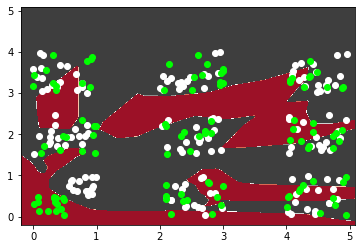

In [28]:
# plt.axis('equal')
plt.contourf(X_axis,Y_axis,np.sign(mesh_pred),cmap='RdGy')
plt.scatter(X_test[Y_test==1,0], X_test[Y_test==1,1] , c= "white" )
plt.scatter(X_test[Y_test==0,0], X_test[Y_test==0,1], c= "lime"  )

In [29]:
X_test.shape

(270, 2)

In [30]:
testset = Grid_data(X_test,Y_test)
testloader = DataLoader(testset,batch_size=10,shuffle=False)

In [31]:
correct = 0
total = 0
out = []
pred = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to("cuda"), labels.to("cuda")
        out.append(labels.cpu().numpy())
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        pred.append(predicted.cpu().numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the %d train images: %d %%' % (270,    100 * correct / total))

Accuracy of the network on the 270 train images: 61 %


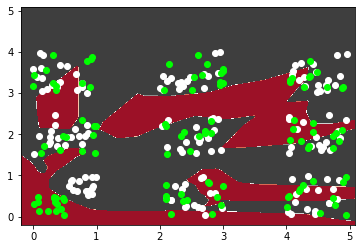

In [32]:
plt.contourf(X_axis,Y_axis,np.sign(mesh_pred),cmap='RdGy')
plt.scatter(X_test[Y_test==1,0], X_test[Y_test==1,1] , c= "white" )
plt.scatter(X_test[Y_test==0,0], X_test[Y_test==0,1], c= "lime"  )

In [33]:
torch.save(net.state_dict(),"model_"+str(epochs_nos)+".pkl")

In [34]:
mesh_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])